In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

/home/pritam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.head())

   buying_price  maintainence_cost  number_of_doors  number_of_seats  \
0             3                  2                4                2   
1             3                  2                2                5   
2             1                  4                2                5   
3             4                  4                2                2   
4             3                  3                3                4   

   luggage_boot_size  safety_rating  popularity  
0                  2              2           1  
1                  2              1           1  
2                  1              3           1  
3                  1              2           1  
4                  3              3           2  


In [7]:
x=train.drop(['popularity'],axis=1)

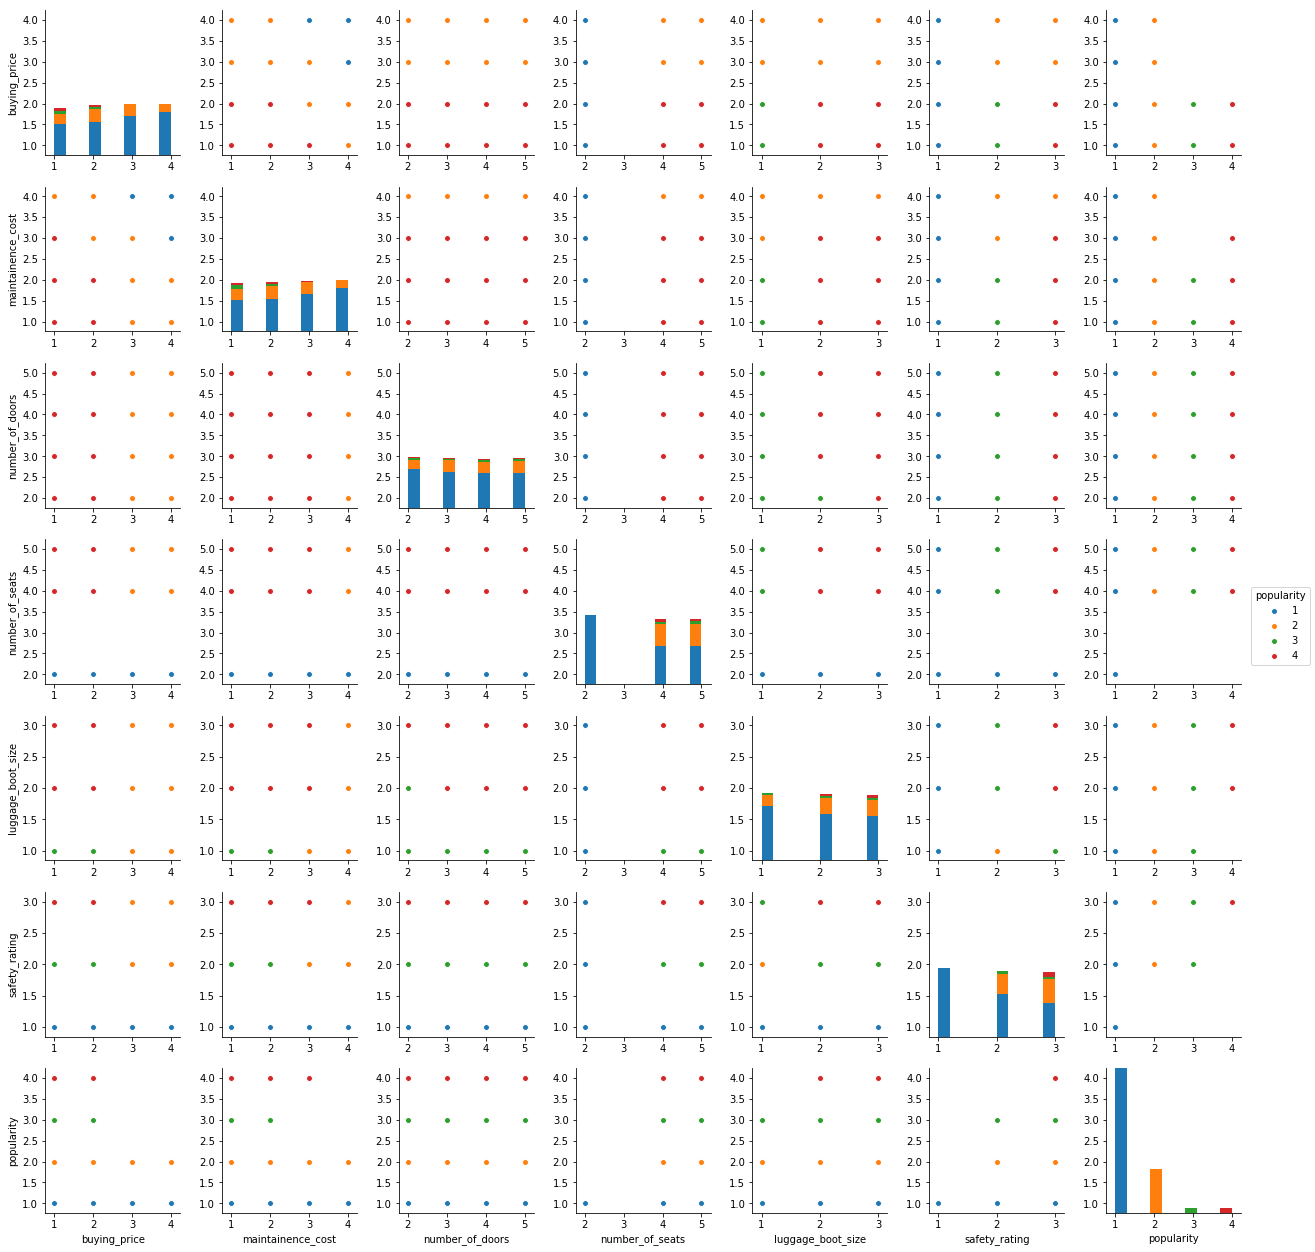

In [13]:
sns.pairplot(train,hue='popularity')

In [14]:
print(train.columns)

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')


In [18]:
print(train['number_of_doors'].unique())

[4 2 3 5]


In [24]:
print(train['safety_rating'].unique())
print(train.columns)

[2 1 3]
Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')


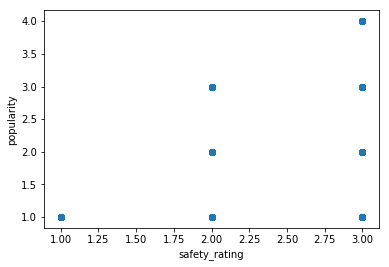

In [31]:
plt.xlabel("safety_rating")
plt.ylabel("popularity")
plt.scatter(train['safety_rating'],train['popularity'])

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')


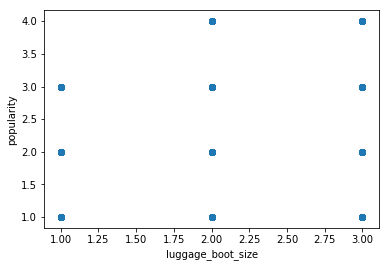

In [33]:
plt.xlabel("luggage_boot_size")
plt.ylabel("popularity")
plt.scatter(train['luggage_boot_size'],train['popularity'])
print(train.columns)

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')


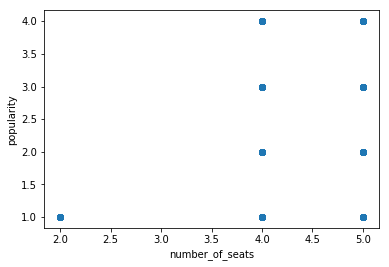

In [34]:
plt.xlabel("number_of_seats")
plt.ylabel("popularity")
plt.scatter(train['number_of_seats'],train['popularity'])
print(train.columns)

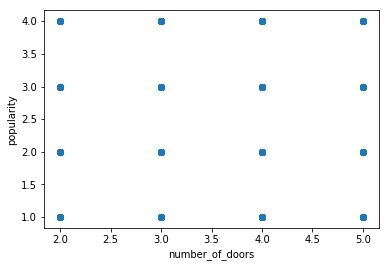

In [35]:
plt.xlabel("number_of_doors")
plt.ylabel("popularity")
plt.scatter(train['number_of_doors'],train['popularity'])

In [36]:
print(train.columns)

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')


In [37]:
features=['luggage_boot_size','safety_rating','number_of_doors']
target=['popularity']

In [43]:
clf=SVC(C=1)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(train[features],train[target],test_size=0.1)

In [45]:
clf.fit(x_train,y_train)

/home/pritam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
clf.score(x_test,y_test)

0.69325153374233128

In [47]:
clf.score(x_train,y_train)

0.73174061433447102

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf1=RandomForestClassifier()

In [50]:
clf1.fit(x_train,y_train)

/home/pritam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
clf1.score(x_test,y_test)

0.68098159509202449